# Fall Detection Dataset Exploration

This notebook explores the fall detection dataset containing:
- **Videos**: Raw video recordings
- **CSV files**: Keypoint data extracted from videos (pose estimation)
- **Two categories**: Fall and No_Fall events

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Dataset Structure Overview

In [4]:
# Define dataset paths
dataset_path = Path(r"D:\Fall Detection\Dataset")
fall_keypoints_path = dataset_path / "Fall" / "Keypoints_CSV"
no_fall_keypoints_path = dataset_path / "No_Fall" / "Keypoints_CSV"

# Count files in each category
fall_files = list(fall_keypoints_path.glob("*.csv"))
no_fall_files = list(no_fall_keypoints_path.glob("*.csv"))

print("=" * 60)
print("DATASET SUMMARY")
print("=" * 60)
print(f"Total Fall samples: {len(fall_files)}")
print(f"Total No Fall samples: {len(no_fall_files)}")
print(f"Total samples: {len(fall_files) + len(no_fall_files)}")
print(f"Class balance ratio (Fall:No_Fall): {len(fall_files)/len(no_fall_files):.2f}")
print("=" * 60)

DATASET SUMMARY
Total Fall samples: 3140
Total No Fall samples: 3848
Total samples: 6988
Class balance ratio (Fall:No_Fall): 0.82


## 2. Analyze CSV Keypoint Structure

In [5]:
# Load a sample CSV file to understand the structure
sample_fall_file = fall_files[0]
df_sample = pd.read_csv(sample_fall_file)

print(f"Sample file: {sample_fall_file.name}")
print(f"\nDataFrame shape: {df_sample.shape}")
print(f"\nColumns: {df_sample.columns.tolist()}")
print(f"\nFirst few rows:")
print(df_sample.head(20))
print(f"\nData types:")
print(df_sample.dtypes)
print(f"\nBasic statistics:")
print(df_sample.describe())

Sample file: 20240912_101331_keypoints.csv

DataFrame shape: (952, 5)

Columns: ['Frame', 'Keypoint', 'X', 'Y', 'Confidence']

First few rows:
    Frame        Keypoint           X           Y  Confidence
0       1            Nose  425.469389  163.052280    0.998950
1       1        Left Eye  423.163118  148.121152    0.995080
2       1       Right Eye  422.335768  147.763206    0.993837
3       1        Left Ear  421.327772  147.391130    0.994753
4       1       Right Ear  420.265560  147.786509    0.997608
5       1   Left Shoulder  387.906961  218.157722    0.998492
6       1  Right Shoulder  335.449476  208.866121    0.999977
7       1      Left Elbow  385.648870  307.488495    0.095060
8       1     Right Elbow  338.492146  310.201979    0.987383
9       1      Left Wrist  400.689783  376.696504    0.088086
10      1     Right Wrist  374.697876  394.663303    0.963408
11      1        Left Hip  381.858501  384.608045    0.998659
12      1       Right Hip  340.076494  387.196645  

In [6]:
# Get unique keypoints and frame information
unique_keypoints = df_sample['Keypoint'].unique()
num_frames = df_sample['Frame'].nunique()
keypoints_per_frame = len(unique_keypoints)

print(f"\nNumber of frames: {num_frames}")
print(f"Number of unique keypoints: {keypoints_per_frame}")
print(f"\nKeypoint names:")
for i, kp in enumerate(unique_keypoints, 1):
    print(f"{i:2d}. {kp}")
    
# Check confidence score distribution
print(f"\nConfidence score statistics:")
print(f"Mean: {df_sample['Confidence'].mean():.4f}")
print(f"Min: {df_sample['Confidence'].min():.4f}")
print(f"Max: {df_sample['Confidence'].max():.4f}")
print(f"Std: {df_sample['Confidence'].std():.4f}")


Number of frames: 56
Number of unique keypoints: 17

Keypoint names:
 1. Nose
 2. Left Eye
 3. Right Eye
 4. Left Ear
 5. Right Ear
 6. Left Shoulder
 7. Right Shoulder
 8. Left Elbow
 9. Right Elbow
10. Left Wrist
11. Right Wrist
12. Left Hip
13. Right Hip
14. Left Knee
15. Right Knee
16. Left Ankle
17. Right Ankle

Confidence score statistics:
Mean: 0.9167
Min: 0.0881
Max: 1.0000
Std: 0.1825


## 3. Analyze Multiple Files

In [7]:
# Analyze frame counts across multiple files
def analyze_csv_files(file_list, label):
    """Analyze multiple CSV files and return statistics"""
    frame_counts = []
    avg_confidences = []
    
    for file in file_list[:20]:  # Sample first 20 files
        df = pd.read_csv(file)
        frame_counts.append(df['Frame'].nunique())
        avg_confidences.append(df['Confidence'].mean())
    
    return {
        'label': label,
        'files_analyzed': len(frame_counts),
        'avg_frames': np.mean(frame_counts),
        'min_frames': np.min(frame_counts),
        'max_frames': np.max(frame_counts),
        'std_frames': np.std(frame_counts),
        'avg_confidence': np.mean(avg_confidences)
    }

# Analyze both categories
fall_stats = analyze_csv_files(fall_files, "Fall")
no_fall_stats = analyze_csv_files(no_fall_files, "No Fall")

# Display results
stats_df = pd.DataFrame([fall_stats, no_fall_stats])
print("\nDataset Statistics (Sample of 20 files from each category):")
print("=" * 80)
print(stats_df.to_string(index=False))
print("=" * 80)


Dataset Statistics (Sample of 20 files from each category):
  label  files_analyzed  avg_frames  min_frames  max_frames  std_frames  avg_confidence
   Fall              20        54.4          39          57    4.079216        0.843675
No Fall              20       162.3          60         360  107.383472        0.845225


## 4. Visualization: Keypoint Confidence Distribution

Analyzing all Fall files...
Analyzing all No Fall files...
Analyzing all No Fall files...

Processed 3140 Fall files and 3848 No Fall files

Processed 3140 Fall files and 3848 No Fall files


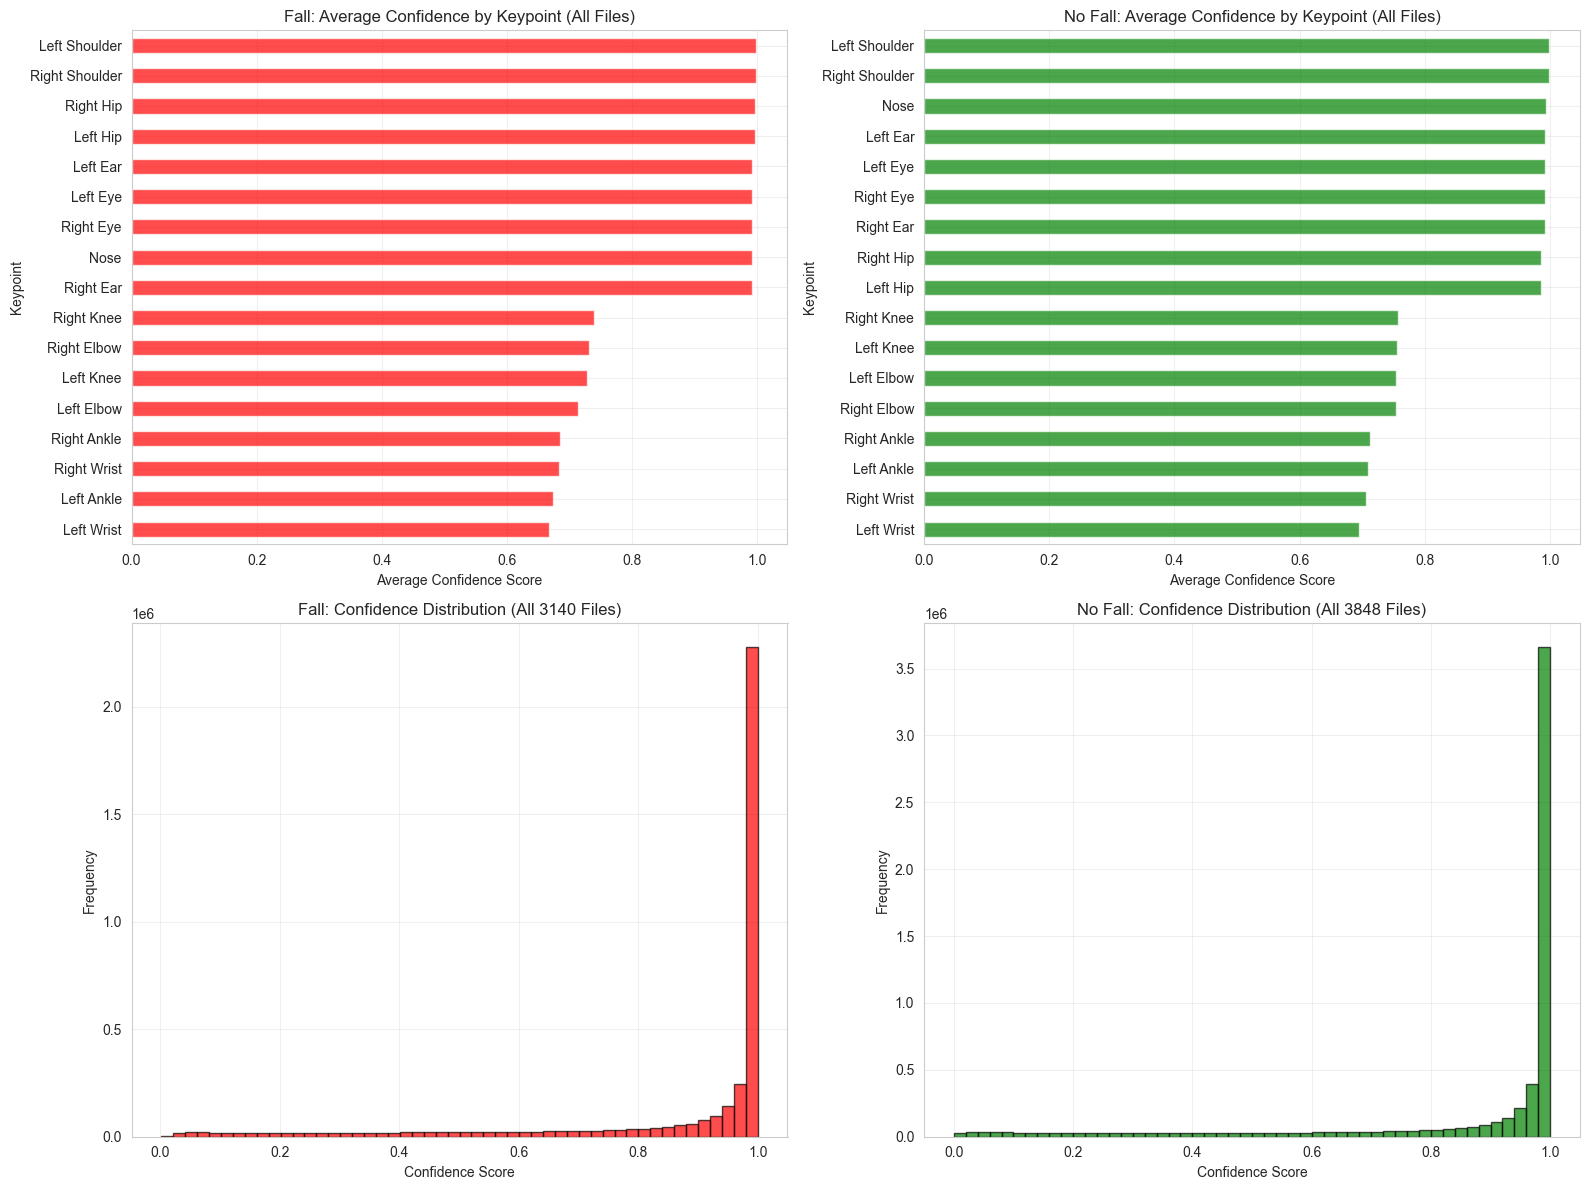


CONFIDENCE STATISTICS ACROSS ALL FILES

Fall Dataset:
  Mean Confidence: 0.8618
  Median Confidence: 0.9919
  Std Confidence: 0.2482

No Fall Dataset:
  Mean Confidence: 0.8659
  Std Confidence: 0.2482

No Fall Dataset:
  Mean Confidence: 0.8659
  Median Confidence: 0.9932
  Std Confidence: 0.2523
  Median Confidence: 0.9932
  Std Confidence: 0.2523


In [10]:
# Analyze all CSV files for confidence distribution
def analyze_confidence_all_files(file_list):
    """Analyze confidence scores across all files"""
    all_keypoint_confidences = []
    all_confidences = []
    
    for file in file_list:
        df = pd.read_csv(file)
        # Collect keypoint-wise confidence
        kp_conf = df.groupby('Keypoint')['Confidence'].mean()
        all_keypoint_confidences.append(kp_conf)
        # Collect all confidence values
        all_confidences.extend(df['Confidence'].tolist())
    
    # Average across all files
    avg_keypoint_conf = pd.concat(all_keypoint_confidences, axis=1).mean(axis=1).sort_values()
    
    return avg_keypoint_conf, all_confidences

print("Analyzing all Fall files...")
fall_keypoint_conf, fall_all_confidences = analyze_confidence_all_files(fall_files)

print("Analyzing all No Fall files...")
no_fall_keypoint_conf, no_fall_all_confidences = analyze_confidence_all_files(no_fall_files)

print(f"\nProcessed {len(fall_files)} Fall files and {len(no_fall_files)} No Fall files")

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Fall - Confidence by keypoint
fall_keypoint_conf.plot(kind='barh', ax=axes[0, 0], color='red', alpha=0.7)
axes[0, 0].set_xlabel('Average Confidence Score')
axes[0, 0].set_title('Fall: Average Confidence by Keypoint (All Files)')
axes[0, 0].grid(True, alpha=0.3)

# No Fall - Confidence by keypoint
no_fall_keypoint_conf.plot(kind='barh', ax=axes[0, 1], color='green', alpha=0.7)
axes[0, 1].set_xlabel('Average Confidence Score')
axes[0, 1].set_title('No Fall: Average Confidence by Keypoint (All Files)')
axes[0, 1].grid(True, alpha=0.3)

# Fall - Overall confidence distribution
axes[1, 0].hist(fall_all_confidences, bins=50, color='red', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Confidence Score')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title(f'Fall: Confidence Distribution (All {len(fall_files)} Files)')
axes[1, 0].grid(True, alpha=0.3)

# No Fall - Overall confidence distribution
axes[1, 1].hist(no_fall_all_confidences, bins=50, color='green', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Confidence Score')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title(f'No Fall: Confidence Distribution (All {len(no_fall_files)} Files)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("\n" + "="*60)
print("CONFIDENCE STATISTICS ACROSS ALL FILES")
print("="*60)
print(f"\nFall Dataset:")
print(f"  Mean Confidence: {np.mean(fall_all_confidences):.4f}")
print(f"  Median Confidence: {np.median(fall_all_confidences):.4f}")
print(f"  Std Confidence: {np.std(fall_all_confidences):.4f}")
print(f"\nNo Fall Dataset:")
print(f"  Mean Confidence: {np.mean(no_fall_all_confidences):.4f}")
print(f"  Median Confidence: {np.median(no_fall_all_confidences):.4f}")
print(f"  Std Confidence: {np.std(no_fall_all_confidences):.4f}")
print("="*60)

## 5. Visualize Skeleton Pose

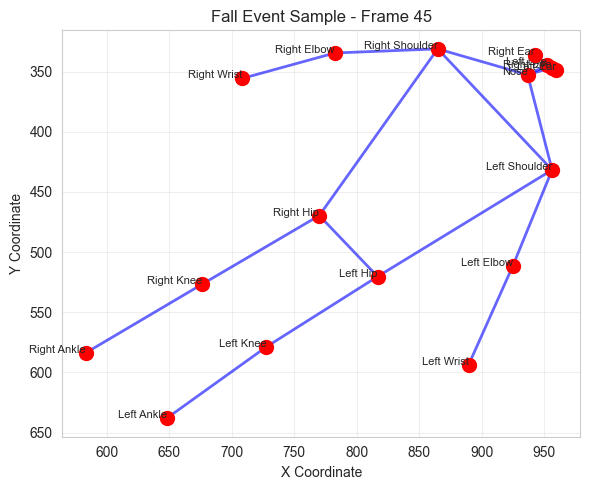

In [32]:
def plot_skeleton(df, frame_num, title="Skeleton Pose"):
    """Plot skeleton for a specific frame"""
    frame_data = df[df['Frame'] == frame_num]
    
    # Define skeleton connections (COCO format)
    connections = [
        ('Nose', 'Left Eye'), ('Nose', 'Right Eye'),
        ('Left Eye', 'Left Ear'), ('Right Eye', 'Right Ear'),
        ('Nose', 'Left Shoulder'), ('Nose', 'Right Shoulder'),
        ('Left Shoulder', 'Right Shoulder'),
        ('Left Shoulder', 'Left Elbow'), ('Left Elbow', 'Left Wrist'),
        ('Right Shoulder', 'Right Elbow'), ('Right Elbow', 'Right Wrist'),
        ('Left Shoulder', 'Left Hip'), ('Right Shoulder', 'Right Hip'),
        ('Left Hip', 'Right Hip'),
        ('Left Hip', 'Left Knee'), ('Left Knee', 'Left Ankle'),
        ('Right Hip', 'Right Knee'), ('Right Knee', 'Right Ankle')
    ]
    
    plt.figure(figsize=(6,5))
    
    # Plot keypoints
    for _, row in frame_data.iterrows():
        plt.scatter(row['X'], row['Y'], c='red', s=100, zorder=3)
        plt.text(row['X'], row['Y'], row['Keypoint'], fontsize=8, ha='right')
    
    # Plot connections
    for conn in connections:
        kp1 = frame_data[frame_data['Keypoint'] == conn[0]]
        kp2 = frame_data[frame_data['Keypoint'] == conn[1]]
        if len(kp1) > 0 and len(kp2) > 0:
            plt.plot([kp1['X'].values[0], kp2['X'].values[0]], 
                    [kp1['Y'].values[0], kp2['Y'].values[0]], 
                    'b-', linewidth=2, alpha=0.6)
    
    plt.gca().invert_yaxis()  # Invert Y-axis for image coordinates
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'{title} - Frame {frame_num}')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot first frame
plot_skeleton(df_sample, frame_num=45, title="Fall Event Sample")

## 6. Compare Fall vs No Fall Poses

Fall sample: 20240912_101331_keypoints.csv
No Fall sample: B_D_0001_keypoints.csv



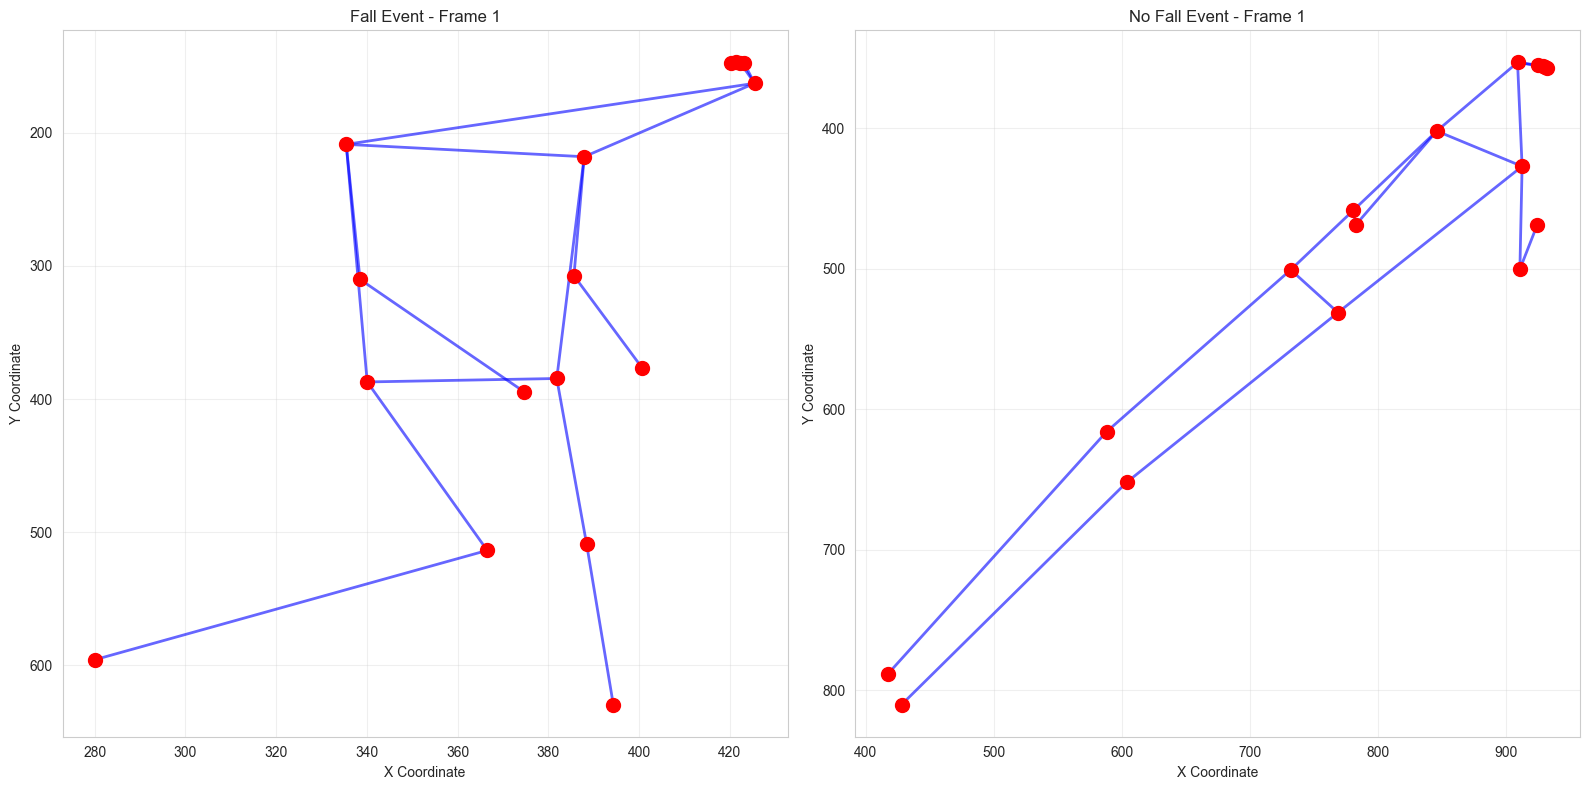

In [33]:
# Load a sample from No Fall category
sample_no_fall_file = no_fall_files[0]
df_no_fall = pd.read_csv(sample_no_fall_file)

print(f"Fall sample: {sample_fall_file.name}")
print(f"No Fall sample: {sample_no_fall_file.name}\n")

# Compare side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Helper function to plot on specific axis
def plot_skeleton_on_axis(df, frame_num, ax, title):
    frame_data = df[df['Frame'] == frame_num]
    connections = [
        ('Nose', 'Left Eye'), ('Nose', 'Right Eye'),
        ('Left Eye', 'Left Ear'), ('Right Eye', 'Right Ear'),
        ('Nose', 'Left Shoulder'), ('Nose', 'Right Shoulder'),
        ('Left Shoulder', 'Right Shoulder'),
        ('Left Shoulder', 'Left Elbow'), ('Left Elbow', 'Left Wrist'),
        ('Right Shoulder', 'Right Elbow'), ('Right Elbow', 'Right Wrist'),
        ('Left Shoulder', 'Left Hip'), ('Right Shoulder', 'Right Hip'),
        ('Left Hip', 'Right Hip'),
        ('Left Hip', 'Left Knee'), ('Left Knee', 'Left Ankle'),
        ('Right Hip', 'Right Knee'), ('Right Knee', 'Right Ankle')
    ]
    
    for _, row in frame_data.iterrows():
        ax.scatter(row['X'], row['Y'], c='red', s=100, zorder=3)
    
    for conn in connections:
        kp1 = frame_data[frame_data['Keypoint'] == conn[0]]
        kp2 = frame_data[frame_data['Keypoint'] == conn[1]]
        if len(kp1) > 0 and len(kp2) > 0:
            ax.plot([kp1['X'].values[0], kp2['X'].values[0]], 
                   [kp1['Y'].values[0], kp2['Y'].values[0]], 
                   'b-', linewidth=2, alpha=0.6)
    
    ax.invert_yaxis()
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)

plot_skeleton_on_axis(df_sample, 1, axes[0], "Fall Event - Frame 1")
plot_skeleton_on_axis(df_no_fall, 1, axes[1], "No Fall Event - Frame 1")

plt.tight_layout()
plt.show()

## 7. Temporal Analysis - Movement Over Time

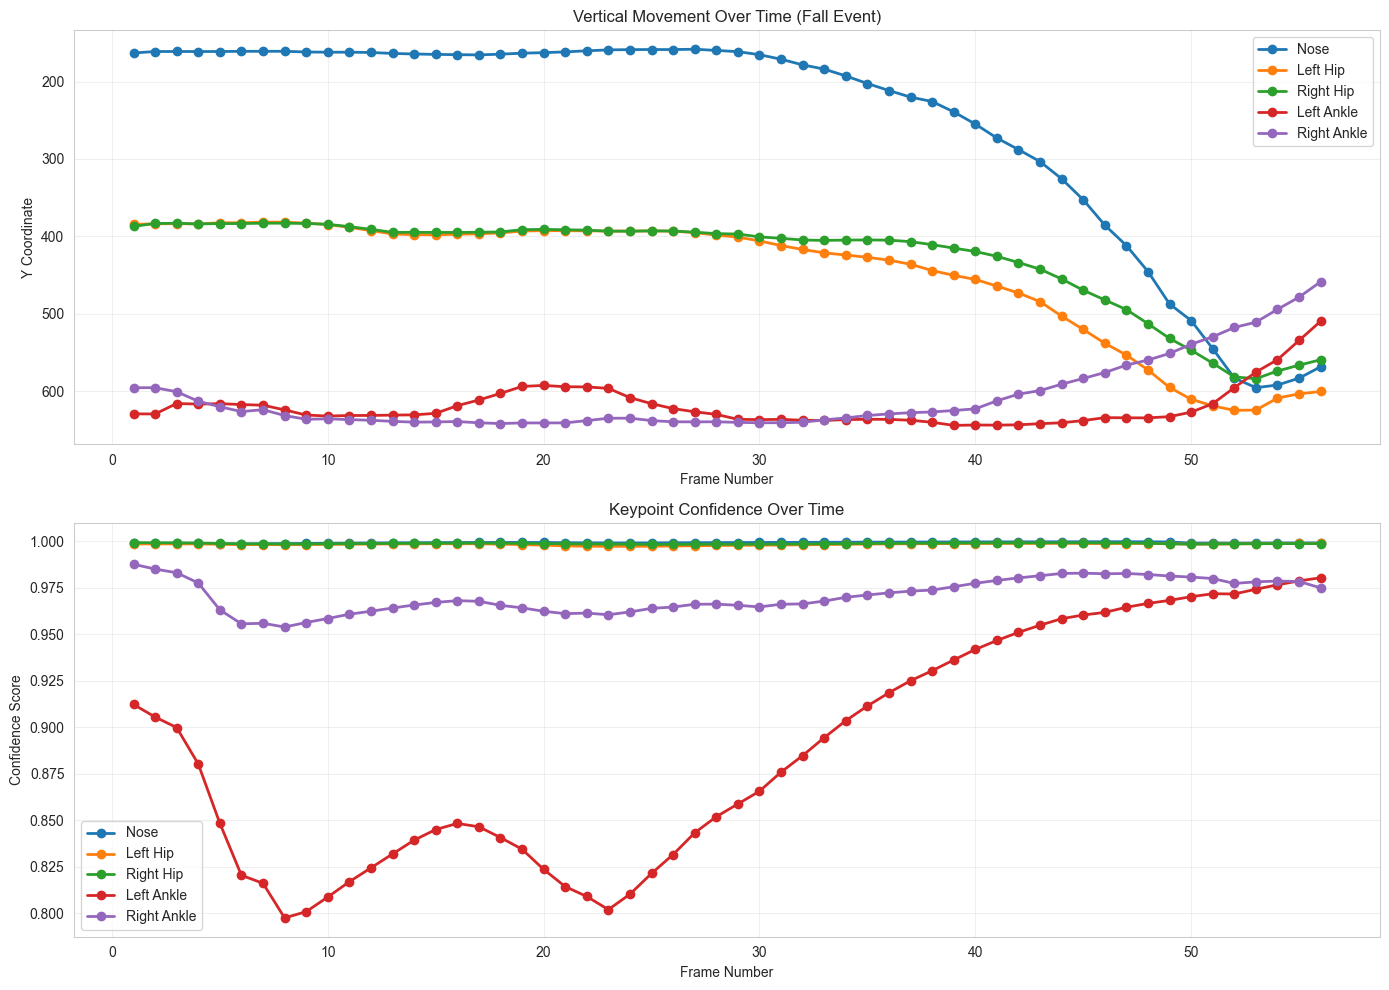

In [34]:
# Track key body parts over time
key_parts = ['Nose', 'Left Hip', 'Right Hip', 'Left Ankle', 'Right Ankle']

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot Y-coordinate movement (vertical movement is key for falls)
for kp in key_parts:
    kp_data = df_sample[df_sample['Keypoint'] == kp]
    axes[0].plot(kp_data['Frame'], kp_data['Y'], marker='o', label=kp, linewidth=2)

axes[0].set_xlabel('Frame Number')
axes[0].set_ylabel('Y Coordinate')
axes[0].set_title('Vertical Movement Over Time (Fall Event)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].invert_yaxis()

# Plot confidence over time for key keypoints
for kp in key_parts:
    kp_data = df_sample[df_sample['Keypoint'] == kp]
    axes[1].plot(kp_data['Frame'], kp_data['Confidence'], marker='o', label=kp, linewidth=2)

axes[1].set_xlabel('Frame Number')
axes[1].set_ylabel('Confidence Score')
axes[1].set_title('Keypoint Confidence Over Time')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Calculate Key Features for Fall Detection

In [42]:
def calculate_features(df):
    """Calculate important features for fall detection"""
    features = []
    
    for frame in df['Frame'].unique():
        frame_data = df[df['Frame'] == frame]
        
        # Get key body parts
        nose = frame_data[frame_data['Keypoint'] == 'Nose']
        left_hip = frame_data[frame_data['Keypoint'] == 'Left Hip']
        right_hip = frame_data[frame_data['Keypoint'] == 'Right Hip']
        left_ankle = frame_data[frame_data['Keypoint'] == 'Left Ankle']
        right_ankle = frame_data[frame_data['Keypoint'] == 'Right Ankle']
        
        if len(nose) > 0 and len(left_hip) > 0 and len(right_hip) > 0:
            # Center of hips
            hip_center_y = (left_hip['Y'].values[0] + right_hip['Y'].values[0]) / 2
            hip_center_x = (left_hip['X'].values[0] + right_hip['X'].values[0]) / 2
            
            # Body height (nose to hip center)
            body_height = abs(nose['Y'].values[0] - hip_center_y)
            
            # Body width (left hip to right hip)
            body_width = abs(left_hip['X'].values[0] - right_hip['X'].values[0])
            
            # Aspect ratio (width/height) - falls typically increase this ratio
            aspect_ratio = body_width / (body_height + 1e-6)
            
            # Vertical position of hips (lower means closer to ground/floor)
            hip_vertical_pos = hip_center_y
            
            # Average confidence
            avg_confidence = frame_data['Confidence'].mean()
            
            features.append({
                'Frame': frame,
                'Body_Height': body_height,
                'Body_Width': body_width,
                'Aspect_Ratio': aspect_ratio,
                'Hip_Vertical_Pos': hip_vertical_pos,
                'Avg_Confidence': avg_confidence
            })
    
    return pd.DataFrame(features)

# Find a fall video with more than 250 frames for better feature visualization
long_fall_file = None
for file in fall_files:
    df_temp = pd.read_csv(file)
    if df_temp['Frame'].nunique() > 250:
        long_fall_file = file
        print(f"Selected fall video with {df_temp['Frame'].nunique()} frames: {file.name}")
        break

if long_fall_file is None:
    print("No fall video with >250 frames found. Using longest available.")
    max_frames = 0
    for file in fall_files:
        df_temp = pd.read_csv(file)
        num_frames = df_temp['Frame'].nunique()
        if num_frames > max_frames:
            max_frames = num_frames
            long_fall_file = file
    print(f"Selected fall video with {max_frames} frames: {long_fall_file.name}")

# Find a no fall video with more than 250 frames for better feature visualization
long_no_fall_file = None
for file in no_fall_files:
    df_temp = pd.read_csv(file)
    if df_temp['Frame'].nunique() > 250:
        long_no_fall_file = file
        print(f"Selected no fall video with {df_temp['Frame'].nunique()} frames: {file.name}")
        break

if long_no_fall_file is None:
    print("No fall video with >250 frames found. Using longest available.")
    max_frames = 0
    for file in no_fall_files:
        df_temp = pd.read_csv(file)
        num_frames = df_temp['Frame'].nunique()
        if num_frames > max_frames:
            max_frames = num_frames
            long_no_fall_file = file
    print(f"Selected no fall video with {max_frames} frames: {long_no_fall_file.name}")

# Load the long videos
df_sample_long = pd.read_csv(long_fall_file)
df_no_fall_long = pd.read_csv(long_no_fall_file)

# Calculate features for both long videos
features_fall = calculate_features(df_sample_long)
features_no_fall = calculate_features(df_no_fall_long)

print("\nFall Event Features (Long Video):")
print(features_fall.describe())
print("\nNo Fall Event Features:")
print(features_no_fall.describe())

Selected fall video with 360 frames: C_D_0070_keypoints.csv
Selected no fall video with 296 frames: B_D_0013_keypoints.csv

Fall Event Features (Long Video):
            Frame  Body_Height  Body_Width  Aspect_Ratio  Hip_Vertical_Pos  \
count  360.000000   360.000000  360.000000    360.000000        360.000000   
mean   180.500000   168.252907   71.421552      0.802241        760.069526   
std    104.067286    94.285582   28.279865      2.173577         81.321111   
min      1.000000     2.919413   18.680077      0.237068        683.176403   
25%     90.750000    88.843558   41.197786      0.342937        703.069999   
50%    180.500000   116.831086   91.631842      0.379650        705.426791   
75%    270.250000   282.793437   97.291603      0.455447        859.966287   
max    360.000000   286.073009   99.181881     29.503010        898.923533   

       Avg_Confidence  
count      360.000000  
mean         0.935211  
std          0.066993  
min          0.794625  
25%          0.8811

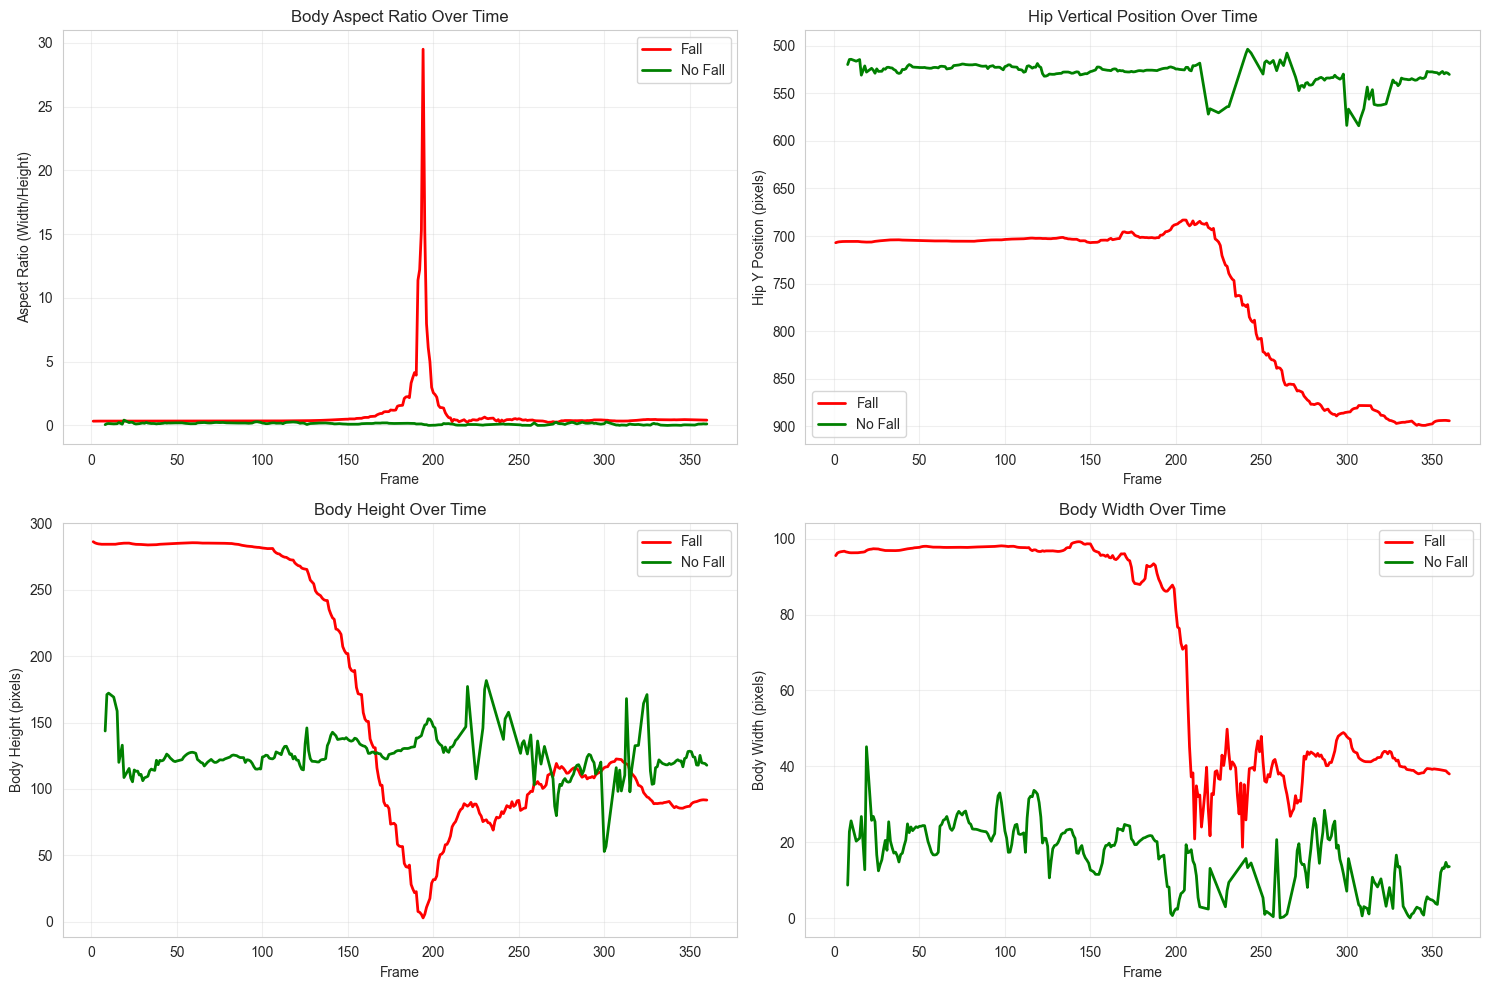

In [43]:
# Visualize key features comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Aspect Ratio over time
axes[0, 0].plot(features_fall['Frame'], features_fall['Aspect_Ratio'], 
                label='Fall', color='red', linewidth=2)
axes[0, 0].plot(features_no_fall['Frame'], features_no_fall['Aspect_Ratio'], 
                label='No Fall', color='green', linewidth=2)
axes[0, 0].set_xlabel('Frame')
axes[0, 0].set_ylabel('Aspect Ratio (Width/Height)')
axes[0, 0].set_title('Body Aspect Ratio Over Time')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Hip Vertical Position
axes[0, 1].plot(features_fall['Frame'], features_fall['Hip_Vertical_Pos'], 
                label='Fall', color='red', linewidth=2)
axes[0, 1].plot(features_no_fall['Frame'], features_no_fall['Hip_Vertical_Pos'], 
                label='No Fall', color='green', linewidth=2)
axes[0, 1].set_xlabel('Frame')
axes[0, 1].set_ylabel('Hip Y Position (pixels)')
axes[0, 1].set_title('Hip Vertical Position Over Time')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].invert_yaxis()

# Body Height
axes[1, 0].plot(features_fall['Frame'], features_fall['Body_Height'], 
                label='Fall', color='red', linewidth=2)
axes[1, 0].plot(features_no_fall['Frame'], features_no_fall['Body_Height'], 
                label='No Fall', color='green', linewidth=2)
axes[1, 0].set_xlabel('Frame')
axes[1, 0].set_ylabel('Body Height (pixels)')
axes[1, 0].set_title('Body Height Over Time')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Body Width
axes[1, 1].plot(features_fall['Frame'], features_fall['Body_Width'], 
                label='Fall', color='red', linewidth=2)
axes[1, 1].plot(features_no_fall['Frame'], features_no_fall['Body_Width'], 
                label='No Fall', color='green', linewidth=2)
axes[1, 1].set_xlabel('Frame')
axes[1, 1].set_ylabel('Body Width (pixels)')
axes[1, 1].set_title('Body Width Over Time')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Hip Trajectory Analysis (Long Video)

Selected video: C_D_0070_keypoints.csv
Number of frames: 360


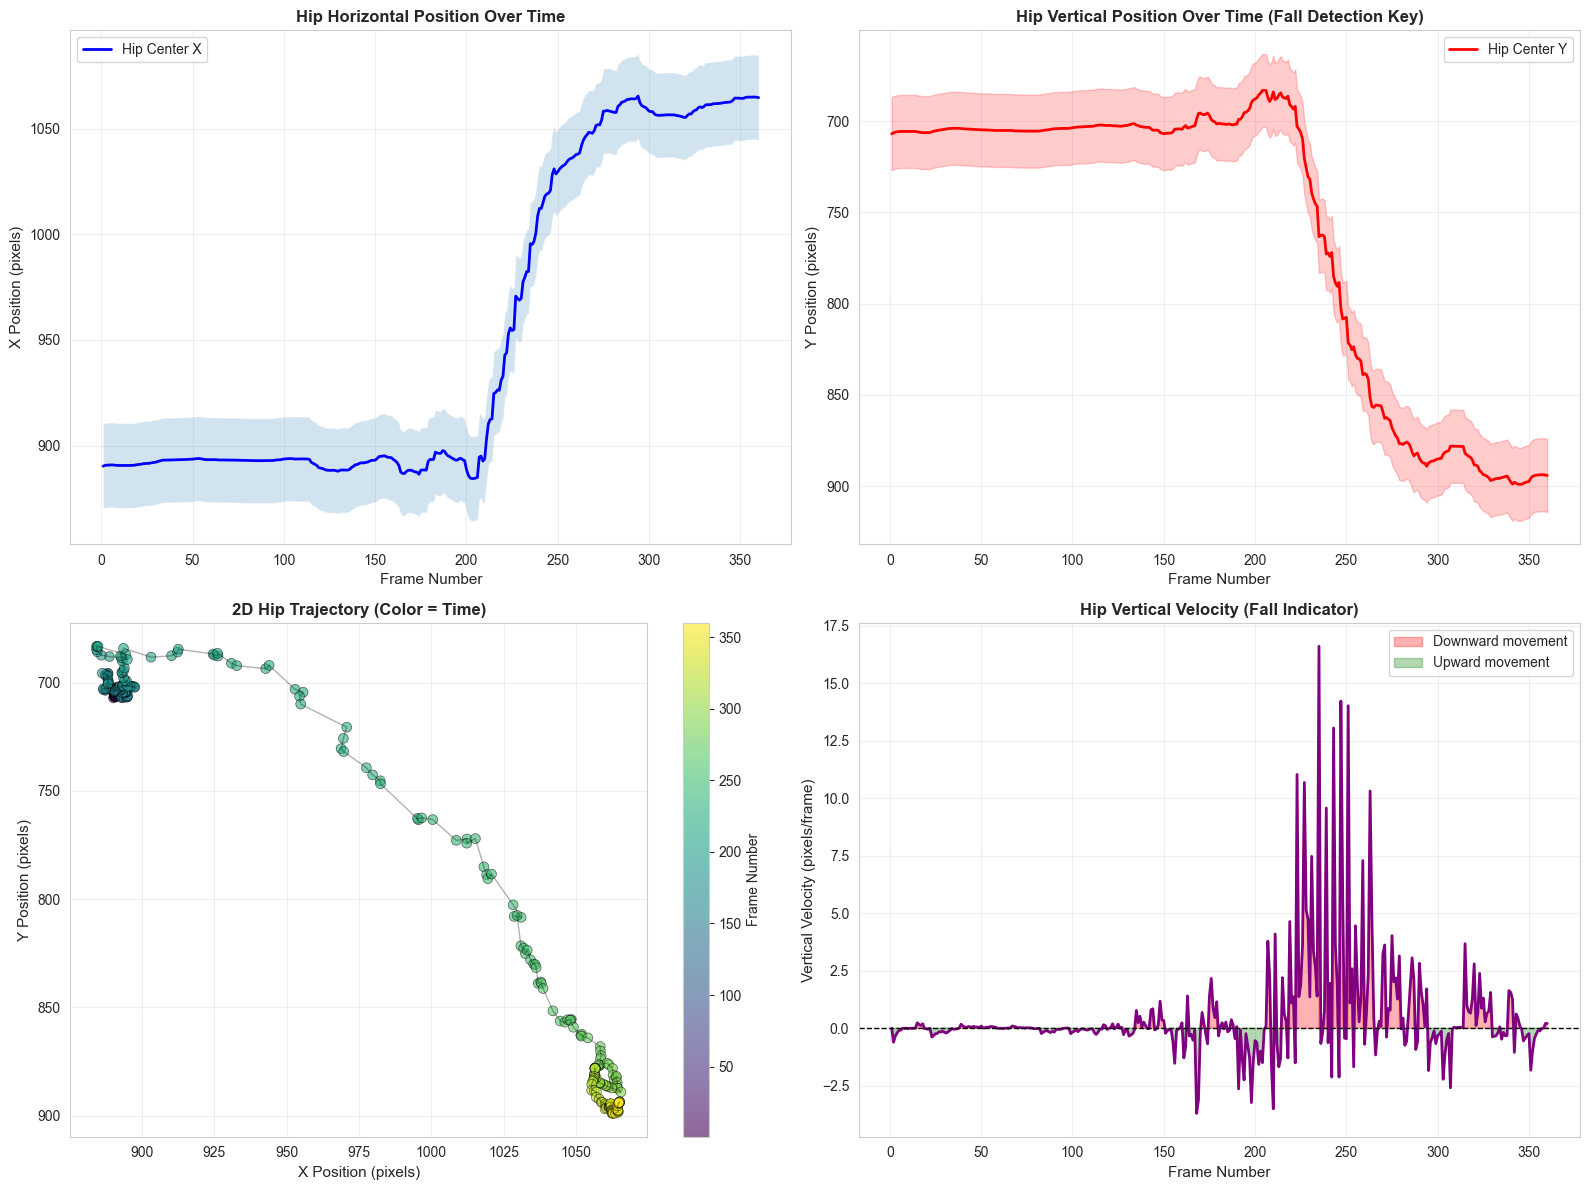


HIP TRAJECTORY ANALYSIS
Video: C_D_0070_keypoints.csv
Total frames: 360

Vertical Movement (Y-coordinate):
  Initial Y position: 707.03
  Final Y position: 894.05
  Total vertical change: 187.02 pixels
  Max Y position: 898.92 (lowest point)
  Min Y position: 683.18 (highest point)

Horizontal Movement (X-coordinate):
  Total horizontal range: 181.00 pixels

Velocity Analysis:
  Max downward velocity: 16.61 pixels/frame
  Max upward velocity: -3.70 pixels/frame
  Average absolute velocity: 1.01 pixels/frame


In [37]:
# Find a video with more than 250 frames
long_video_file = None
for file in fall_files:
    df_temp = pd.read_csv(file)
    num_frames_temp = df_temp['Frame'].nunique()
    if num_frames_temp > 250:
        long_video_file = file
        break

if long_video_file is None:
    print("No video found with more than 250 frames. Using longest available video.")
    # Find longest video
    max_frames = 0
    for file in fall_files:
        df_temp = pd.read_csv(file)
        num_frames_temp = df_temp['Frame'].nunique()
        if num_frames_temp > max_frames:
            max_frames = num_frames_temp
            long_video_file = file

# Load the long video
df_long = pd.read_csv(long_video_file)
num_frames_long = df_long['Frame'].nunique()

print(f"Selected video: {long_video_file.name}")
print(f"Number of frames: {num_frames_long}")

# Extract hip positions over time
left_hip_data = df_long[df_long['Keypoint'] == 'Left Hip'][['Frame', 'X', 'Y', 'Confidence']]
right_hip_data = df_long[df_long['Keypoint'] == 'Right Hip'][['Frame', 'X', 'Y', 'Confidence']]

# Calculate hip center
hip_center = pd.DataFrame({
    'Frame': left_hip_data['Frame'].values,
    'X': (left_hip_data['X'].values + right_hip_data['X'].values) / 2,
    'Y': (left_hip_data['Y'].values + right_hip_data['Y'].values) / 2,
    'Confidence': (left_hip_data['Confidence'].values + right_hip_data['Confidence'].values) / 2
})

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Hip X position over time
axes[0, 0].plot(hip_center['Frame'], hip_center['X'], color='blue', linewidth=2, label='Hip Center X')
axes[0, 0].fill_between(hip_center['Frame'], hip_center['X'] - 20, hip_center['X'] + 20, alpha=0.2)
axes[0, 0].set_xlabel('Frame Number', fontsize=11)
axes[0, 0].set_ylabel('X Position (pixels)', fontsize=11)
axes[0, 0].set_title('Hip Horizontal Position Over Time', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# 2. Hip Y position over time (most important for fall detection)
axes[0, 1].plot(hip_center['Frame'], hip_center['Y'], color='red', linewidth=2, label='Hip Center Y')
axes[0, 1].fill_between(hip_center['Frame'], hip_center['Y'] - 20, hip_center['Y'] + 20, alpha=0.2, color='red')
axes[0, 1].set_xlabel('Frame Number', fontsize=11)
axes[0, 1].set_ylabel('Y Position (pixels)', fontsize=11)
axes[0, 1].set_title('Hip Vertical Position Over Time (Fall Detection Key)', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].invert_yaxis()
axes[0, 1].legend()

# 3. 2D trajectory of hip center
scatter = axes[1, 0].scatter(hip_center['X'], hip_center['Y'], 
                            c=hip_center['Frame'], cmap='viridis', 
                            s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1, 0].plot(hip_center['X'], hip_center['Y'], 'k-', alpha=0.3, linewidth=1)
axes[1, 0].set_xlabel('X Position (pixels)', fontsize=11)
axes[1, 0].set_ylabel('Y Position (pixels)', fontsize=11)
axes[1, 0].set_title('2D Hip Trajectory (Color = Time)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].invert_yaxis()
cbar = plt.colorbar(scatter, ax=axes[1, 0])
cbar.set_label('Frame Number', fontsize=10)

# 4. Hip velocity (change in Y position)
y_velocity = np.diff(hip_center['Y'].values)
y_velocity = np.concatenate([[0], y_velocity])  # Add 0 for first frame
axes[1, 1].plot(hip_center['Frame'], y_velocity, color='purple', linewidth=2)
axes[1, 1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1, 1].fill_between(hip_center['Frame'], 0, y_velocity, where=(y_velocity > 0), 
                        color='red', alpha=0.3, label='Downward movement')
axes[1, 1].fill_between(hip_center['Frame'], 0, y_velocity, where=(y_velocity < 0), 
                        color='green', alpha=0.3, label='Upward movement')
axes[1, 1].set_xlabel('Frame Number', fontsize=11)
axes[1, 1].set_ylabel('Vertical Velocity (pixels/frame)', fontsize=11)
axes[1, 1].set_title('Hip Vertical Velocity (Fall Indicator)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Print analysis
print("\n" + "="*60)
print("HIP TRAJECTORY ANALYSIS")
print("="*60)
print(f"Video: {long_video_file.name}")
print(f"Total frames: {num_frames_long}")
print(f"\nVertical Movement (Y-coordinate):")
print(f"  Initial Y position: {hip_center['Y'].iloc[0]:.2f}")
print(f"  Final Y position: {hip_center['Y'].iloc[-1]:.2f}")
print(f"  Total vertical change: {hip_center['Y'].iloc[-1] - hip_center['Y'].iloc[0]:.2f} pixels")
print(f"  Max Y position: {hip_center['Y'].max():.2f} (lowest point)")
print(f"  Min Y position: {hip_center['Y'].min():.2f} (highest point)")
print(f"\nHorizontal Movement (X-coordinate):")
print(f"  Total horizontal range: {hip_center['X'].max() - hip_center['X'].min():.2f} pixels")
print(f"\nVelocity Analysis:")
print(f"  Max downward velocity: {y_velocity.max():.2f} pixels/frame")
print(f"  Max upward velocity: {y_velocity.min():.2f} pixels/frame")
print(f"  Average absolute velocity: {np.abs(y_velocity).mean():.2f} pixels/frame")
print("="*60)

C:\Users\YODA\AppData\Local\Temp\ipykernel_23228\268757874.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([fall_frame_counts, no_fall_frame_counts],


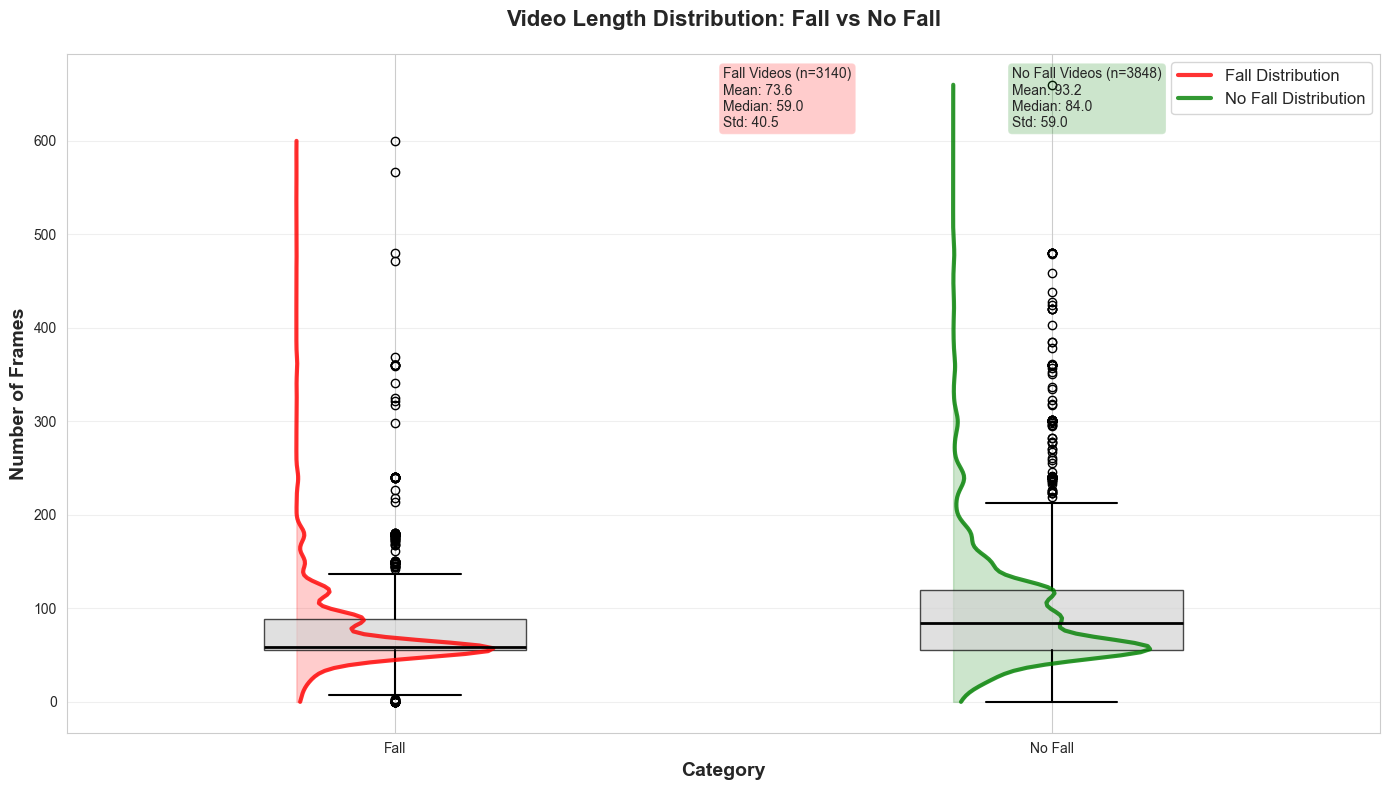


VIDEO LENGTH DISTRIBUTION ANALYSIS

Fall Videos:
  Count: 3140
  Mean: 73.58 frames
  Median: 59.00 frames
  Std Dev: 40.53 frames
  Min: 0 frames
  Max: 600 frames
  25th percentile: 56.00 frames
  75th percentile: 89.00 frames

No Fall Videos:
  Count: 3848
  Mean: 93.21 frames
  Median: 84.00 frames
  Std Dev: 58.96 frames
  Min: 0 frames
  Max: 660 frames
  25th percentile: 56.00 frames
  75th percentile: 120.00 frames

Comparison:
  Difference in means: -19.63 frames
  Difference in medians: -25.00 frames


In [38]:
# Calculate frame counts for all videos
fall_frame_counts = []
for file in fall_files:
    df_temp = pd.read_csv(file)
    fall_frame_counts.append(df_temp['Frame'].nunique())

no_fall_frame_counts = []
for file in no_fall_files:
    df_temp = pd.read_csv(file)
    no_fall_frame_counts.append(df_temp['Frame'].nunique())

# Create DataFrame for plotting
frame_data = pd.DataFrame({
    'Frames': fall_frame_counts + no_fall_frame_counts,
    'Category': ['Fall'] * len(fall_frame_counts) + ['No Fall'] * len(no_fall_frame_counts)
})

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Create boxplot
bp = ax.boxplot([fall_frame_counts, no_fall_frame_counts], 
                 positions=[1, 2], 
                 widths=0.4,
                 patch_artist=True,
                 labels=['Fall', 'No Fall'],
                 boxprops=dict(facecolor='lightgray', alpha=0.7),
                 medianprops=dict(color='black', linewidth=2),
                 whiskerprops=dict(linewidth=1.5),
                 capprops=dict(linewidth=1.5))

# Overlay distribution curves using KDE
from scipy import stats

# Fall distribution (red)
fall_kde = stats.gaussian_kde(fall_frame_counts)
fall_x = np.linspace(min(fall_frame_counts), max(fall_frame_counts), 200)
fall_y = fall_kde(fall_x)
# Scale to fit on plot
fall_y_scaled = (fall_y / fall_y.max()) * 0.3 + 0.85
ax.plot(fall_y_scaled, fall_x, color='red', linewidth=3, label='Fall Distribution', alpha=0.8)
ax.fill_betweenx(fall_x, 0.85, fall_y_scaled, color='red', alpha=0.2)

# No Fall distribution (green)
no_fall_kde = stats.gaussian_kde(no_fall_frame_counts)
no_fall_x = np.linspace(min(no_fall_frame_counts), max(no_fall_frame_counts), 200)
no_fall_y = no_fall_kde(no_fall_x)
# Scale to fit on plot
no_fall_y_scaled = (no_fall_y / no_fall_y.max()) * 0.3 + 1.85
ax.plot(no_fall_y_scaled, no_fall_x, color='green', linewidth=3, label='No Fall Distribution', alpha=0.8)
ax.fill_betweenx(no_fall_x, 1.85, no_fall_y_scaled, color='green', alpha=0.2)

# Formatting
ax.set_xlabel('Category', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Frames', fontsize=14, fontweight='bold')
ax.set_title('Video Length Distribution: Fall vs No Fall', fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='y')
ax.legend(fontsize=12, loc='upper right')

# Add statistics text
fall_stats = f"Fall Videos (n={len(fall_frame_counts)})\n" \
             f"Mean: {np.mean(fall_frame_counts):.1f}\n" \
             f"Median: {np.median(fall_frame_counts):.1f}\n" \
             f"Std: {np.std(fall_frame_counts):.1f}"

no_fall_stats = f"No Fall Videos (n={len(no_fall_frame_counts)})\n" \
                f"Mean: {np.mean(no_fall_frame_counts):.1f}\n" \
                f"Median: {np.median(no_fall_frame_counts):.1f}\n" \
                f"Std: {np.std(no_fall_frame_counts):.1f}"

ax.text(0.5, 0.98, fall_stats, transform=ax.transAxes, fontsize=10, 
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='red', alpha=0.2))
ax.text(0.72, 0.98, no_fall_stats, transform=ax.transAxes, fontsize=10, 
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='green', alpha=0.2))

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n" + "="*60)
print("VIDEO LENGTH DISTRIBUTION ANALYSIS")
print("="*60)
print(f"\nFall Videos:")
print(f"  Count: {len(fall_frame_counts)}")
print(f"  Mean: {np.mean(fall_frame_counts):.2f} frames")
print(f"  Median: {np.median(fall_frame_counts):.2f} frames")
print(f"  Std Dev: {np.std(fall_frame_counts):.2f} frames")
print(f"  Min: {np.min(fall_frame_counts)} frames")
print(f"  Max: {np.max(fall_frame_counts)} frames")
print(f"  25th percentile: {np.percentile(fall_frame_counts, 25):.2f} frames")
print(f"  75th percentile: {np.percentile(fall_frame_counts, 75):.2f} frames")

print(f"\nNo Fall Videos:")
print(f"  Count: {len(no_fall_frame_counts)}")
print(f"  Mean: {np.mean(no_fall_frame_counts):.2f} frames")
print(f"  Median: {np.median(no_fall_frame_counts):.2f} frames")
print(f"  Std Dev: {np.std(no_fall_frame_counts):.2f} frames")
print(f"  Min: {np.min(no_fall_frame_counts)} frames")
print(f"  Max: {np.max(no_fall_frame_counts)} frames")
print(f"  25th percentile: {np.percentile(no_fall_frame_counts, 25):.2f} frames")
print(f"  75th percentile: {np.percentile(no_fall_frame_counts, 75):.2f} frames")

# Statistical comparison
print(f"\nComparison:")
print(f"  Difference in means: {np.mean(fall_frame_counts) - np.mean(no_fall_frame_counts):.2f} frames")
print(f"  Difference in medians: {np.median(fall_frame_counts) - np.median(no_fall_frame_counts):.2f} frames")
print("="*60)